In [1]:
import numpy as np

In [2]:
X = [[1,1],[1,-1],[-1,1],[-1,-1]]
X = np.array(X)

In [3]:
Y = [[1],[1],[1],[-1]]
Y = np.array(Y)
#w = np.zeros(Y.shape[0])

In [4]:
n,d = X.shape


In [5]:
X
# y = np.inner(X, w)
# y

array([[ 1,  1],
       [ 1, -1],
       [-1,  1],
       [-1, -1]])

In [6]:
def func(w,X,Y):
    
    Y_hat = np.inner(X,w)
    
    res = 0.0
    for i in range(n):
        res += np.log(1 + np.exp(-Y_hat[i] * Y[i]))
    
    res = res/n 
    return res[0]

In [7]:
def gradient(w,X,Y):
    
    G = np.zeros(d+1)
    Y_hat = np.inner(X,w) 
    
    for j in range(d+1):
        res = 0.0
        for i in range(n):
            res += (1/(1 + np.exp(-Y_hat[i] * Y[i])) * np.exp(-Y_hat[i] * Y[i]) * (-Y[i]) * X[i][j])
        
        G[j] = res[0]/n
    
    return G

In [8]:
def gd(X,Y,eta,ls=True,tol = 0.001, maxiter = 1000,print_f=False,acc = False):
    n,d = X.shape
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    X = b
    w = np.zeros((d+1))
    res = []
    
    #Armijo's Rule
    
    if ls :
        '''
        h = func(w,X,Y)
        while(func((w-eta*(np.linalg.norm(gradient(w,X,Y)))),X,Y) > (func(w,X,Y) - (eta*(np.linalg.norm(gradient(w,X,Y)))**2)/2) ):
            eta = eta/2
        '''
        h = func(w,X,Y)
        while(h > (func(w,X,Y) - (eta*(np.linalg.norm(gradient(w,X,Y))) **2)/2) ):
            eta = eta/2
            h = func((w-eta*(gradient(w,X,Y))),X,Y)
        
            
    ###Gradient descent 
    for t in range(maxiter):
        g = gradient(w,X,Y)
        
        #some printing
        if print_f == True:
            res.append(np.linalg.norm(w))
        
        elif acc == True:
            pred = 0.0
            Y_hat = np.inner(X,w) 
            for i in range(n):
                b = Y_hat[i] * Y[i]
                if b >0:
                    pred +=1
            pred = pred/n
            res.append(pred)

        else:
            res.append(func(w,X,Y))   
        ###Gradient descent 
        if np.linalg.norm(g) <=tol:
            break
        else:
            w = w- eta*g
          #some printing
        
    return res

In [9]:
a = []

a = gd(X,Y,4/3,ls=False, tol = 0.001, maxiter =1000)

In [10]:
import matplotlib.pyplot as plt

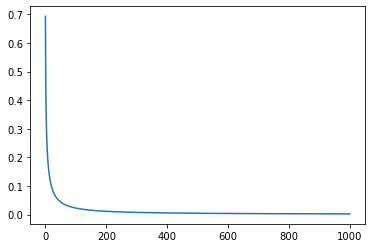

In [11]:
plt.plot(a)

In [12]:
b = []
b = gd(X,Y,eta = 4/3,ls=True, tol = 0.001, maxiter =1000)

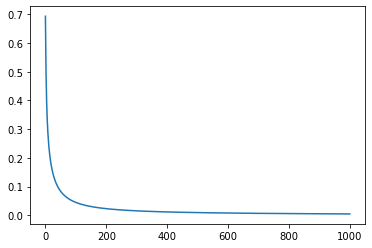

In [13]:
plt.plot(b)

In [14]:
c = []

c = gd(X,Y,4/3,ls=True, tol = 0.001, maxiter =1000,print_f = True)

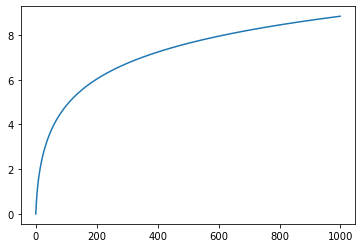

In [15]:
plt.plot(c)

In [16]:
class_acc = []

class_acc = gd(X,Y,4/3,ls=False, tol = 0.001, maxiter =1000,acc = True)

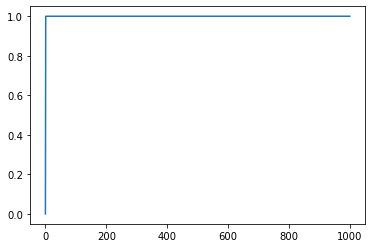

In [17]:
plt.plot(class_acc)

In [18]:
#1.5
def gd(X,Y,eta,ls=True,tol = 0.001, maxiter = 1000):
    n,d = X.shape
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    X = b
    w = np.zeros((d+1))
    
    #Armijo's Rule
    
    if ls :
        '''
        h = func(w,X,Y)
        while(func((w-eta*(np.linalg.norm(gradient(w,X,Y)))),X,Y) > (func(w,X,Y) - (eta*(np.linalg.norm(gradient(w,X,Y)))**2)/2) ):
            eta = eta/2
        '''
        h = func(w,X,Y)
        while(h > (func(w,X,Y) - (eta*(np.linalg.norm(gradient(w,X,Y))) **2)/2) ):
            eta = eta/2
            h = func((w-eta*(gradient(w,X,Y))),X,Y)
        
            
    ###Gradient descent 
    for t in range(maxiter):
        g = gradient(w,X,Y)

        ###Gradient descent 
        if np.linalg.norm(g) <=tol:
            break
        else:
            w = w- eta*g
          #some printing
        
    return w

In [19]:
w = gd(X,Y,4/3,ls=False, tol = 0.001, maxiter =1)

In [20]:
w/np.linalg.norm(w)

array([0.57735027, 0.57735027, 0.57735027])

In [21]:
w = gd(X,Y,4/3,ls=False, tol = 0.001, maxiter =10)

In [22]:
w/np.linalg.norm(w)

array([0.57735027, 0.57735027, 0.57735027])

In [23]:
w = gd(X,Y,4/3,ls=False, tol = 0.001, maxiter =100)
w/np.linalg.norm(w)

array([0.57735027, 0.57735027, 0.57735027])

In [24]:
w = gd(X,Y,4/3,ls=False, tol = 0.001, maxiter =1000)
w/np.linalg.norm(w)

array([0.57735027, 0.57735027, 0.57735027])

In [25]:
w = gd(X,Y,4/3,ls=False, tol = 0.001, maxiter =10000)
w/np.linalg.norm(w)

array([0.57735027, 0.57735027, 0.57735027])

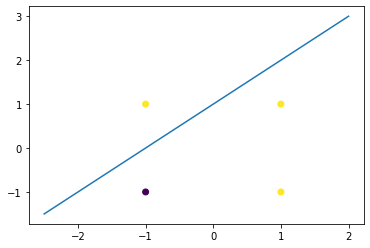

In [26]:
x_point = np.array([1,1,-1,-1])
y_point = np.array([1,-1,1,-1])
label = Y
plt.scatter(x_point, y_point, c = label)
x = np.linspace(-2.5,2,120)
y = w[0]/w[2] + w[1]/w[2] *x
plt.plot(x,y)

In [27]:
def gd(X,Y,eta,w,ls=True,tol = 0.001, maxiter = 1000,print_f=False,acc = False):
    n,d = X.shape
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    X = b
    #w = np.zeros((d+1))
    res = []
    
    #Armijo's Rule
    
    if ls :
        '''
        h = func(w,X,Y)
        while(func((w-eta*(np.linalg.norm(gradient(w,X,Y)))),X,Y) > (func(w,X,Y) - (eta*(np.linalg.norm(gradient(w,X,Y)))**2)/2) ):
            eta = eta/2
        '''
        h = func(w,X,Y)
        while(h > (func(w,X,Y) - (eta*(np.linalg.norm(gradient(w,X,Y))) **2)/2) ):
            eta = eta/2
            h = func((w-eta*(gradient(w,X,Y))),X,Y)
        
            
    ###Gradient descent 
    for t in range(maxiter):
        g = gradient(w,X,Y)
        
        #some printing
        if print_f == True:
            res.append(np.linalg.norm(w))
        
        elif acc == True:
            pred = 0.0
            Y_hat = np.inner(X,w) 
            for i in range(n):
                b = Y_hat[i] * Y[i]
                if b >0:
                    pred +=1
            pred = pred/n
            res.append(pred)

        else:
            res.append(func(w,X,Y))   
        ###Gradient descent 
        if np.linalg.norm(g) <=tol:
            break
        else:
            w = w- eta*g
          #some printing
        
    #print(w)
    return res

In [28]:
w = np.zeros((3))

In [29]:
Y = [[-1],[1],[1],[-1]]
Y = np.array(Y)

In [30]:
tim = []
tim = gd(X,Y,eta = 1,w = w,ls=False, tol = 0.001, maxiter =1000)

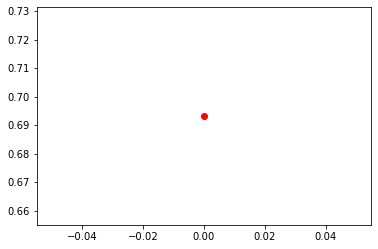

In [31]:
plt.plot(tim,'ro')

In [32]:
tim

[0.6931471805599453]

In [33]:
tim = []
tim = gd(X,Y,eta = 4/3,w = w,ls=True, tol = 0.001, maxiter =1000)

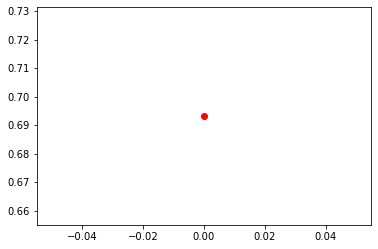

In [34]:
plt.plot(tim,'ro')

In [35]:
tim = []
tim = gd(X,Y,eta = 4/3,w = w,ls=True, tol = 0.001, maxiter =1000,print_f = True)

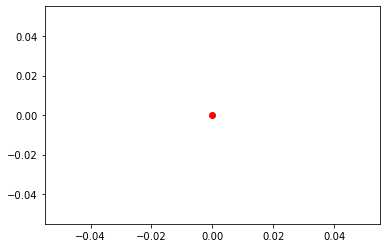

In [36]:
plt.plot(tim,'ro')

In [37]:
tim = []
tim = gd(X,Y,eta = 4/3,w = w,ls=True, tol = 0.001, maxiter =1000,acc = True)

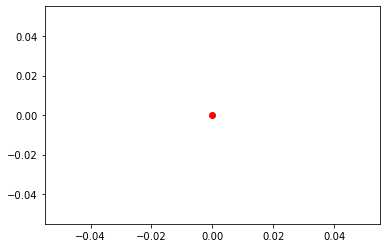

In [38]:
plt.plot(tim,'ro')